##  предобработка данных от Дениса и Кирилла

In [2]:
import json

def read_json_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            return data
        
    except FileNotFoundError:
        print(f"Файл {file_path} не найден.")
        
    except json.JSONDecodeError:
        print(f"Ошибка декодирования JSON в файле {file_path}.")

In [3]:
# файл Кирилла

paths_data_loc = '/Users/asenkasazonova/Downloads/Telegram Desktop/result.json'
paths_data = read_json_file(paths_data_loc)

if paths_data:
    first_key_Kirill = list(paths_data.keys())[0]

# paths_data[first_key_Kirill]

In [4]:
# файл Дениса

first_approximation_data_loc = '/Users/asenkasazonova/Downloads/Telegram Desktop/result (3).json'
first_approximation_data = read_json_file(first_approximation_data_loc)

if first_approximation_data:
    first_key_Denis = list(first_approximation_data.keys())[0]
    print(f'first_key_Denis = {first_key_Denis}')

first_approximation_data[first_key_Denis].keys()
first_key_Denis_noClass_costs = first_approximation_data[first_key_Denis]['Нет_Имя_судна_1']['costs']

first_key_Denis = 03-Mar-2020


In [5]:
icebreaker_needed = []
numeric_costs = []

for key, value in first_key_Denis_noClass_costs.items():
    if value == 'Нужен ледокол':
        icebreaker_needed.append(key)
    elif isinstance(value, (int, float)):
        numeric_costs.append(key)


print("Ключи, для которых нужен ледокол:\n")
for el in icebreaker_needed:
    print(el)

print("\nКлючи, для которых значение числовое:\n")
for el in numeric_costs:
    print(el)

Ключи, для которых нужен ледокол:

Вход в Обскую губу + Новый порт
Восточно-Сибирское - 1 (восток) + Рейд Певек
Карское - 1 (сбор каравана) + Мыс Желания
Вход в Обскую губу + Карское - 1 (сбор каравана)
Берингов пролив + Берингово
Карское - 1 (сбор каравана) + Карское - 3 (центр)
Лаптевых - 4 (юг) + устье Лены
пролив Лонга + Восточно-Сибирское - 1 (восток)
Восточно-Сибирское - 3 (север) + Восточно-Сибирское - 2 (запад)
Лаптевых - 2 (центр) + Пролив Санникова - 1
остров Котельный + Лаптевых - 3 (восток)
МОТ Печора + Варандей-Приразломное
Бухта Север и Диксон + Карское - 2 (прибрежный)
Лаптевых - 1 (центр) + устье Лены
Лаптевых - 1 (центр) + остров Котельный
Вход в Обскую губу + терминал Утренний
Лаптевых - 4 (юг) + Хатангский залив
Бухта Север и Диксон + Дудинка
Восточно-Сибирское - 2 (запад) + Восточно-Сибирское - 1 (восток)
Лаптевых - 2 (центр) + остров Котельный
пролив Вилькицкого - 3 + Лаптевых - 1 (центр)
Лаптевых - 1 (центр) + Лаптевых - 2 (центр)
пролив Вилькицкого - восток + про

In [6]:
graph1 = df["03-Mar-2020"]['Нет_Имя_судна_1']
graph2 = df["03-Mar-2020"]['Arc 4_Имя_судна_2']
graph3 = df["03-Mar-2020"]['Arc 7_Имя_судня_3']

combined_graph = nx.compose(graph1, graph2)
combined_graph = nx.compose(combined_graph, graph3)

NameError: name 'df' is not defined

In [ ]:
print(f"вершин в ледовом графе за 03-Mar-2020: \t {len(combined_graph.nodes())}")
print(f"ребер в ледовом графе за 03-Mar-2020: \t {len(combined_graph.edges())}")

print("грубые оценки сверху, если число вершин и ребер бы не ")

вершин в ледовом графе за 03-Mar-2020: 	 6605
ребер в ледовом графе за 03-Mar-2020: 	 49080


In [ ]:
import networkx as nx

def difference_graph(G1, G2):
    diff_graph = nx.Graph()
    
    for node in G1.nodes():
        if node not in G2.nodes():
            diff_graph.add_node(node)
    
    for edge in G1.edges():
        if edge not in G2.edges():
            diff_graph.add_edge(*edge)
    
    return diff_graph

In [ ]:
import pandas as pd
import numpy as np
import json

df_initial = pd.read_excel('/Users/asenkasazonova/Desktop/17. Росатом/IntegrVelocity.xlsx', sheet_name='03-Mar-2020')  # Укажите путь к вашему файлу и имя листа
np_array = df_initial.to_numpy()

ports_json_path = '/Users/asenkasazonova/Downloads/Telegram Desktop/port_indices.json'

with open(ports_json_path, 'r', encoding='utf-8') as f:
    data_ports = json.load(f)

data_ports.values()

dict_values([[35, 39], [67, 48], [47, 55], [71, 61], [197, 48], [192, 42], [87, 62], [68, 38], [78, 42], [35, 39], [68, 38], [201, 31], [219, 27], [78, 42], [115, 55], [151, 61], [180, 36], [195, 21], [159, 56], [125, 67], [159, 56], [141, 60], [177, 53], [43, 59], [47, 55], [77, 69], [78, 60], [141, 60], [27, 23], [71, 61], [125, 67], [79, 66], [35, 39], [125, 67], [35, 39], [106, 54], [47, 55], [180, 36], [192, 42], [220, 25], [219, 27], [112, 54], [112, 54], [47, 55], [71, 61], [151, 61], [79, 66]])

In [ ]:
def create_array_with_graphs(np_array, graph1, graph2, graph3, port_indeces):
    np_array[np_array == -10] = -30
    np_array[(np_array >= 0) & (np_array <= 22)] = 50
    
    for node in graph1.nodes():
        row, col = node
        np_array[row, col] = 70

    for node in graph2.nodes():
        row, col = node
        np_array[row, col] = 100

    for node in graph3.nodes():
        row, col = node
        np_array[row, col] = 150
    
    for port in port_indeces:
        row, col = port
        np_array[row, col] = 200

    return np.rot90(np_array, k=3)

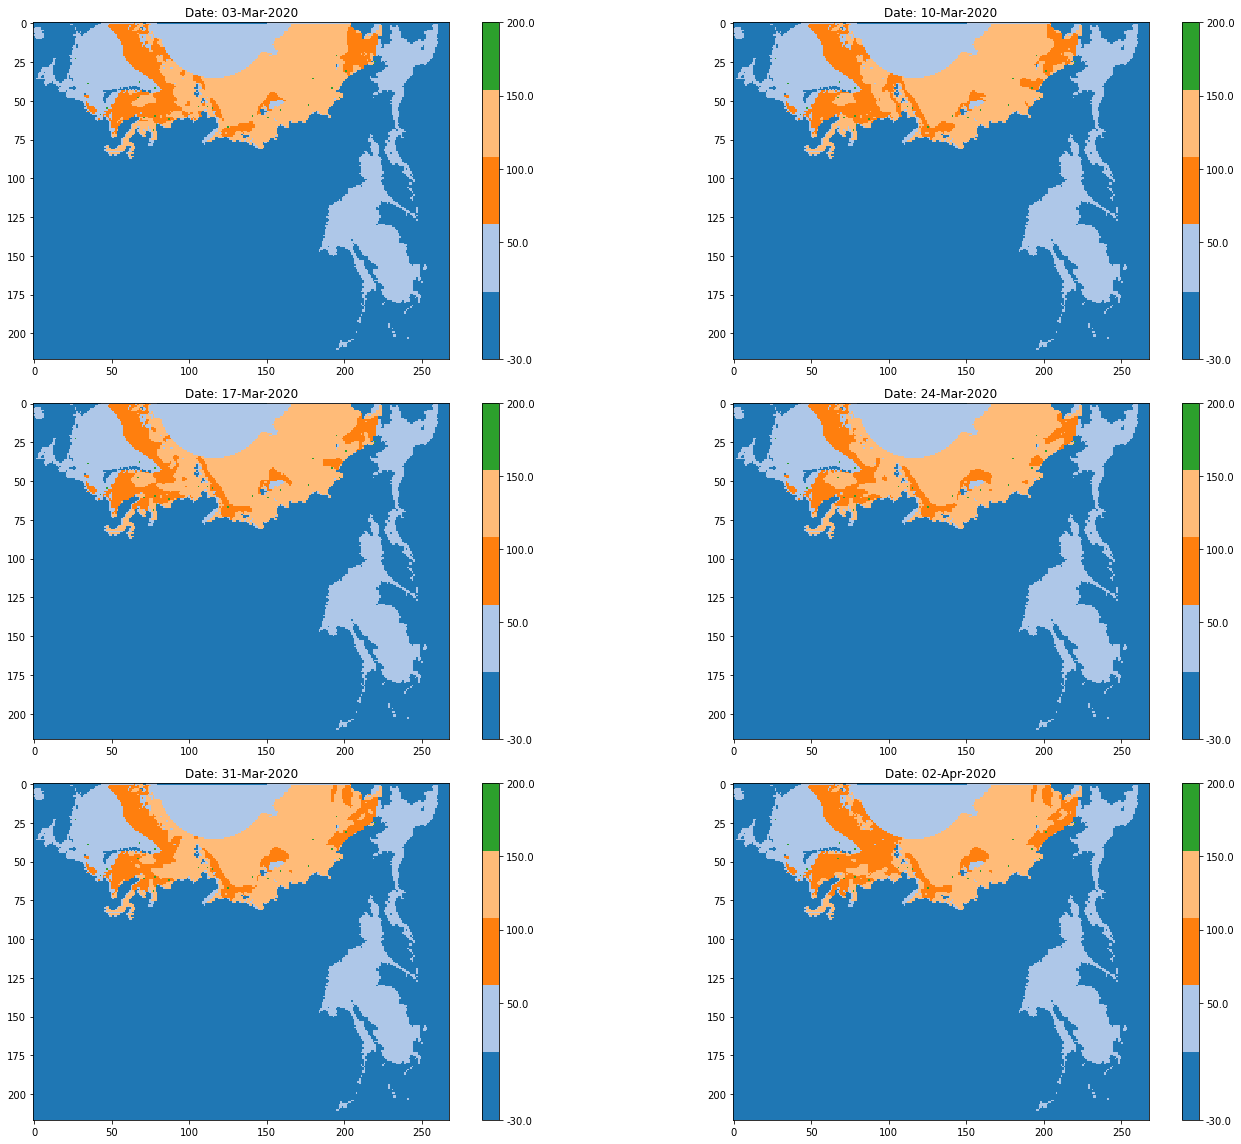

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

dates = list(df.keys())[:6]

fig, axes = plt.subplots(3, 2, figsize=(22, 16))  

for i, date in enumerate(dates):
    graph1 = df[date]['Нет_Имя_судна_1'].to_undirected()
    graph2 = df[date]['Arc 4_Имя_судна_2'].to_undirected()
    graph3 = df[date]['Arc 7_Имя_судня_3'].to_undirected()

    cur_np_array = create_array_with_graphs(np_array, graph1, graph2, graph3, data_ports.values())
    cur_np_array = np.flip(cur_np_array, axis=1)

    unique_values = np.unique(cur_np_array)
    cmap_name = 'tab20'
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i) for i in range(len(unique_values))]
    custom_cmap = ListedColormap(colors)
    
    norm = plt.Normalize(vmin=min(unique_values), vmax=max(unique_values))
    
    ax = axes[i // 2, i % 2]
    
    im = ax.imshow(cur_np_array, cmap=custom_cmap, norm=norm, interpolation='none')
    ax.set_title(f'Date: {date}')
    
    cbar = plt.colorbar(im, ax=ax, ticks=unique_values, fraction=0.035, pad=0.04)
    cbar.ax.set_yticklabels([str(val) for val in unique_values])  
plt.tight_layout()
plt.show()

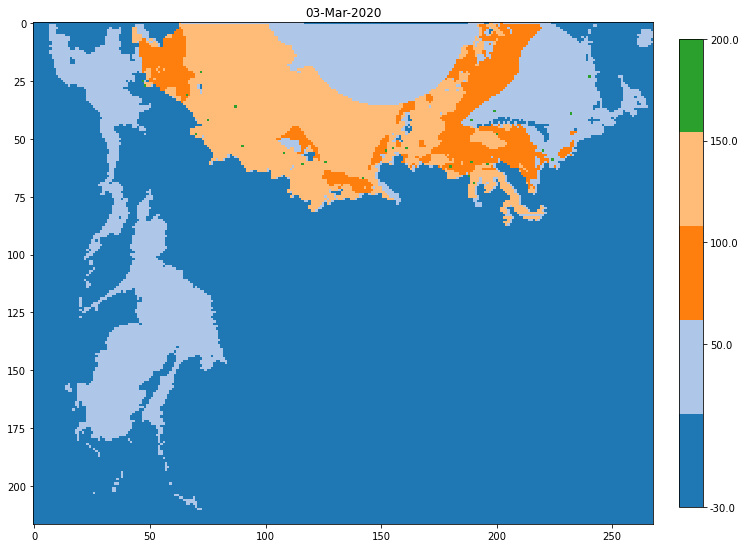

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

graph1 = df['03-Mar-2020']['Нет_Имя_судна_1'].to_undirected()
graph2 = df['03-Mar-2020']['Arc 4_Имя_судна_2'].to_undirected()
graph3 = df['03-Mar-2020']['Arc 7_Имя_судня_3'].to_undirected()

rotated_array = create_array_with_graphs(np_array, graph1, graph2, graph3, data_ports.values())

unique_values = list(np.unique(rotated_array))


cmap_name = 'tab20' 
cmap = plt.get_cmap(cmap_name)
colors = [cmap(i) for i in range(len(unique_values))]

custom_cmap = ListedColormap(colors)
norm = plt.Normalize(vmin=min(unique_values), vmax=max(unique_values))

plt.figure(figsize=(12, 12))
plt.imshow(rotated_array, cmap=custom_cmap, norm=norm, interpolation='none')

cbar = plt.colorbar(ticks=unique_values, fraction=0.035, pad=0.04)
cbar.ax.set_yticklabels([str(val) for val in unique_values])

plt.title('03-Mar-2020')
plt.show()

In [ ]:
import pickle

with open("/Users/asenkasazonova/Downloads/Telegram Desktop/new_format_result (2).pkl", "rb") as f:
    df = pickle.load(f)
    
g = df["03-Mar-2020"]["Нет_Имя_судна_1"]['edges']

edges_corteges = []

for edge in g:
    # print(f"{edge['target']} <- {edge['source']}" )
    # print((edge['source'], edge['target']))
    edges_corteges.append((edge['source'], edge['target']))
    # print(f'')

# edges_corteges

#  Замечательно, с исходным графом расстояний все хорошо

In [ ]:
unique_tuples = set()

duplicates = []

for t in edges_corteges:
    if t in unique_tuples or (t[1], t[0]) in unique_tuples:
        duplicates.append(t)
    else:
        unique_tuples.add(t)

duplicates

[]

In [ ]:
sorted(list(unique_tuples)) == sorted(edges_corteges)

True

# Граница

In [ ]:
boundary_file_path = '/Users/asenkasazonova/Downloads/Telegram Desktop/ice_graph_boundary_points.pkl'

with open(boundary_file_path, "rb") as f:
    boundary_data = pickle.load(f)

In [ ]:
boundary_data.keys()

dict_keys(['03-Mar-2020', '10-Mar-2020', '17-Mar-2020', '24-Mar-2020', '31-Mar-2020', '02-Apr-2020', '07-Apr-2020', '14-Apr-2020', '21-Apr-2020', '28-Apr-2020', '05-May-2020', '12-May-2020', '19-May-2020', '26-May-2020'])

In [ ]:
for date in boundary_data.keys():
    for ship_type in boundary_data[date].keys():
        print(f'граница для {ship_type} ({date})')
        print(boundary_data[date][ship_type])
        print("\n")

граница для Нет_Имя_судна_1 (03-Mar-2020)
[(38, 58), (47, 57), (47, 59), (52, 70), (51, 71), (51, 72), (51, 73), (54, 2), (54, 3), (54, 5), (57, 7), (59, 61), (60, 62), (62, 3), (62, 5), (62, 4), (62, 44), (62, 50), (63, 3), (64, 3), (65, 2), (65, 46), (66, 2), (66, 46), (67, 1), (67, 45), (69, 25), (69, 62), (70, 45), (70, 59), (70, 62), (71, 45), (71, 57), (71, 58), (71, 60), (71, 62), (72, 58), (72, 62), (73, 62), (74, 62), (76, 21), (76, 22), (76, 46), (76, 64), (77, 21), (77, 22), (77, 47), (77, 65), (76, 75), (77, 75), (78, 19), (78, 20), (78, 22), (78, 23), (78, 24), (79, 19), (79, 21), (81, 26), (81, 27), (82, 22), (82, 27), (83, 23), (83, 60), (84, 25), (84, 26), (85, 25), (85, 26), (85, 28), (85, 48), (85, 59), (85, 66), (86, 27), (86, 43), (87, 39), (87, 40), (87, 41), (87, 48), (87, 58), (88, 26), (88, 56), (88, 64), (89, 27), (89, 28), (89, 56), (94, 55), (96, 57), (96, 58), (97, 54), (98, 54), (101, 57), (102, 57), (102, 58), (103, 61), (104, 62), (105, 58), (106, 37), (1

# Число судов разных типов

In [ ]:
ships_data = pd.read_excel('/Users/asenkasazonova/Downloads/Telegram Desktop/data.xlsx') # , sheet_name='03-Mar-2020'
ships_data['Ледовый класс'].value_counts()


Arc 4    19
Arc 7    13
Arc 5     8
Нет       2
Name: Ледовый класс, dtype: int64

## Точки ожидания на границе ледового графа для каждого судна

#### файл Дениса с начальным решением

In [ ]:
ships_initial_routes_path = '/Users/asenkasazonova/Downloads/Telegram Desktop/first_approx_routes_2_0.json'

with open(ships_initial_routes_path, 'r', encoding='utf-8') as f:
    ships_initial_routes = json.load(f)

ships_initial_routes.keys()

dict_keys(['ДЮК II', 'САРМАТ', 'EDUARD TOLL', 'GEORGIY USHAKOV', 'RUDOLF SAMOYLOVICH', 'VLADIMIR VORONIN', 'NIKOLAY YEVGENOV', 'CHRISTOPHE DE MARGERIE', 'BORIS VILKITSKY', 'АРКТИКА-2', 'ИНЖЕНЕР ВЕШНЯКОВ', 'ТАМБЕЙ', 'ШТУРМАН АЛЬБАНОВ', 'НИКИФОР БЕГИЧЕВ', 'НОРИЛЬСКИЙ НИКЕЛЬ', 'АЙС ИГЛ', 'ШТУРМАН КОШЕЛЕВ', 'ШТУРМАН ЩЕРБИНИН', 'ШТУРМАН СКУРАТОВ', 'ИОГАНН МАХМАСТАЛЬ', 'BORIS SOKOLOV', 'ИНЖЕНЕР ТРУБИН', 'БАРЕНЦ', 'ПОЛАР КИНГ', 'МЫС ДЕЖНЕВА', 'СЕВМОРПУТЬ', 'ГРИГОРИЙ ШЕЛИХОВ', 'УРАРТУ', 'ФЕСКО ПАРИС', 'ПРОГРЕСС', 'МИХАИЛ БРИТНЕВ', 'САБЕТТА', 'ГЕОРГИЙ УШАКОВ', 'СЕВЕРНЫЙ ПРОЕКТ', 'НИКОЛАЙ ЧУДОТВОРЕЦ', 'БЕРИНГ', 'ТОЛБУХИН', 'ЯМАЛ КРЕЧЕТ', 'CLEAN VISION', 'YAMAL SPIRIT', 'ТИКСИ', 'ТАЙБОЛА', '50 лет Победы', 'Ямал', 'Таймыр', 'Вайгач'])

In [ ]:
ships_json = {}

for idx, ship in enumerate(list(ships_initial_routes.keys())[:-4]):
    
    ship_name = ship
    ship_id = idx

    source_harbor_id = ships_initial_routes[ship]['source']
    target_harbor_id = ships_initial_routes[ship]['target']
    
    ships_json[str(idx)] = {'ship_name' : ship_name, 
                            'ship_id' : ship_id,
                            'source_harbor_id' : source_harbor_id,
                            'target_harbor_id' : target_harbor_id}

df_ships_data = pd.read_excel('/Users/asenkasazonova/Downloads/Telegram Desktop/data.xlsx')

for ship in ships_json:
    ship_name = ships_json[ship]['ship_name']

    ship_type, ship_speed = df_ships_data.loc[df_ships_data['Название судна'] == ship_name, ['Ледовый класс', 'speed']].values[0]
    ships_json[ship]['ship_type'] = ship_type
    ships_json[ship]['ship_speed'] = ship_speed

print(ships_json.keys(), "\n")

for ship in ships_json:
    print(ships_json[ship])

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41']) 

{'ship_name': 'ДЮК II', 'ship_id': 0, 'source_harbor_id': 11, 'target_harbor_id': 41, 'ship_type': 'Arc 5', 'ship_speed': 15}
{'ship_name': 'САРМАТ', 'ship_id': 1, 'source_harbor_id': 25, 'target_harbor_id': 29, 'ship_type': 'Arc 4', 'ship_speed': 15}
{'ship_name': 'EDUARD TOLL', 'ship_id': 2, 'source_harbor_id': 25, 'target_harbor_id': 41, 'ship_type': 'Arc 7', 'ship_speed': 15}
{'ship_name': 'GEORGIY USHAKOV', 'ship_id': 3, 'source_harbor_id': 4, 'target_harbor_id': 27, 'ship_type': 'Arc 7', 'ship_speed': 15}
{'ship_name': 'RUDOLF SAMOYLOVICH', 'ship_id': 4, 'source_harbor_id': 11, 'target_harbor_id': 24, 'ship_type': 'Arc 7', 'ship_speed': 15}
{'ship_name': 'VLADIMIR VORONIN', 'ship_id': 5, 'source_harbor_id': 25, 'target_harbor_id

#### файл Кирилла с кратчайшими путями до ледового графа

In [ ]:
with open("/Users/asenkasazonova/Downloads/Telegram Desktop/result_path_to_boundary_points.pkl", "rb") as f:
    data_paths_to_ice_graphs = pickle.load(f)


In [ ]:
data_paths_to_ice_graphs.keys()

dict_keys(['03-Mar-2020', '10-Mar-2020', '17-Mar-2020', '24-Mar-2020', '31-Mar-2020', '02-Apr-2020', '07-Apr-2020', '14-Apr-2020', '21-Apr-2020', '28-Apr-2020', '05-May-2020', '12-May-2020', '19-May-2020', '26-May-2020'])

In [ ]:
def extend_repl(x):
    if x == 'Нет':
        return x + '_Имя_судна_1'
    
    cl = int(x.split()[-1])
    if 3 < cl <= 6:
        return 'Arc 4_Имя_судна_2'
    else:
        return 'Arc 7_Имя_судня_3'

In [ ]:
ships_json

{'0': {'ship_name': 'ДЮК II',
  'ship_id': 0,
  'source_harbor_id': 11,
  'target_harbor_id': 41,
  'ship_type': 'Arc 5',
  'ship_speed': 15},
 '1': {'ship_name': 'САРМАТ',
  'ship_id': 1,
  'source_harbor_id': 25,
  'target_harbor_id': 29,
  'ship_type': 'Arc 4',
  'ship_speed': 15},
 '2': {'ship_name': 'EDUARD TOLL',
  'ship_id': 2,
  'source_harbor_id': 25,
  'target_harbor_id': 41,
  'ship_type': 'Arc 7',
  'ship_speed': 15},
 '3': {'ship_name': 'GEORGIY USHAKOV',
  'ship_id': 3,
  'source_harbor_id': 4,
  'target_harbor_id': 27,
  'ship_type': 'Arc 7',
  'ship_speed': 15},
 '4': {'ship_name': 'RUDOLF SAMOYLOVICH',
  'ship_id': 4,
  'source_harbor_id': 11,
  'target_harbor_id': 24,
  'ship_type': 'Arc 7',
  'ship_speed': 15},
 '5': {'ship_name': 'VLADIMIR VORONIN',
  'ship_id': 5,
  'source_harbor_id': 25,
  'target_harbor_id': 27,
  'ship_type': 'Arc 7',
  'ship_speed': 15},
 '6': {'ship_name': 'NIKOLAY YEVGENOV',
  'ship_id': 6,
  'source_harbor_id': 35,
  'target_harbor_id': 27,

In [ ]:
ice_graph_start_finish = {}

for date in data_paths_to_ice_graphs.keys():
    # print('\n Дата: ', date)
    ice_graph_start_finish[date] = {}

    for ship_id in ships_json.keys():

        ship_type = extend_repl(ships_json[ship_id]['ship_type'])

        start_id = ships_json[ship_id]['source_harbor_id']
        finish_id = ships_json[ship_id]['target_harbor_id']

        for harbour in data_paths_to_ice_graphs[date][ship_type]:
            
            if harbour['id'] == start_id:
                closest_from_start = harbour['closest_ice_graph_index']
                cost_from_start = harbour['cost']

            elif harbour['id'] == finish_id:
                closest_from_finish = harbour['closest_ice_graph_index']
                cost_from_finish = harbour['cost']
        
        ice_graph_start_finish[date][str(ship_id)] = {'ice_border_from_start' : closest_from_start, 
                                                    'cost_from_start' : cost_from_start,
                                                    'ice_border_from_finish' : closest_from_finish,
                                                    'cost_from_finish' : cost_from_finish,
                                                    }

ice_graph_start_finish

{'03-Mar-2020': {'0': {'ice_border_from_start': (60, 78),
   'cost_from_start': 0,
   'ice_border_from_finish': (60, 79),
   'cost_from_finish': 0},
  '1': {'ice_border_from_start': (65, 67),
   'cost_from_start': 0,
   'ice_border_from_finish': (60, 79),
   'cost_from_finish': 0},
  '2': {'ice_border_from_start': (65, 67),
   'cost_from_start': 0,
   'ice_border_from_finish': (60, 79),
   'cost_from_finish': 0},
  '3': {'ice_border_from_start': (65, 67),
   'cost_from_start': 0,
   'ice_border_from_finish': (198, 32),
   'cost_from_finish': 2.6486372978324764},
  '4': {'ice_border_from_start': (60, 78),
   'cost_from_start': 0,
   'ice_border_from_finish': (140, 70),
   'cost_from_finish': 1.574656977870061},
  '5': {'ice_border_from_start': (65, 67),
   'cost_from_start': 0,
   'ice_border_from_finish': (198, 32),
   'cost_from_finish': 2.6486372978324764},
  '6': {'ice_border_from_start': (65, 68),
   'cost_from_start': 0,
   'ice_border_from_finish': (198, 32),
   'cost_from_finish

### поиск кратчайших путей между входом и выходом в ледовый граф

#### импорт ледового графа от Кирилла

In [ ]:
import pickle

with open("/Users/asenkasazonova/Downloads/Telegram Desktop/ice_graphs (2).pkl", "rb") as f:
    ice_graph_data = pickle.load(f)
    
graph1 = ice_graph_data["03-Mar-2020"]['Нет_Имя_судна_1'].to_undirected()
graph2 = ice_graph_data["03-Mar-2020"]['Arc 4_Имя_судна_2'].to_undirected()
graph3 = ice_graph_data["03-Mar-2020"]['Arc 7_Имя_судня_3'].to_undirected()

# Объединение графов
combined_graph = nx.compose(graph1, graph2)
combined_graph = nx.compose(combined_graph, graph3)

print(f"вершин в общем ледовом графе за 03-Mar-2020: \t {len(combined_graph.nodes())}")
print(f"ребер в общем ледовом графе за 03-Mar-2020: \t {len(combined_graph.edges())}")

print('\n')

print(f"вершин в 1 ледовом графе за 03-Mar-2020: \t {len(graph1.nodes())}")
print(f"ребер в 1 ледовом графе за 03-Mar-2020: \t {len(graph1.edges())}")

вершин в общем ледовом графе за 03-Mar-2020: 	 6605
ребер в общем ледовом графе за 03-Mar-2020: 	 24540


вершин в 1 ледовом графе за 03-Mar-2020: 	 6605
ребер в 1 ледовом графе за 03-Mar-2020: 	 24540


#### код

In [ ]:
enter_nodes_check_lst = []
exit_nodes_check_lst = []

for date in list(ice_graph_start_finish.keys())[3:]:
    print(f'Дата: \t {date}')

    g1 = ice_graph_data[date]['Нет_Имя_судна_1']
    g2 = ice_graph_data[date]['Arc 4_Имя_судна_2']
    g3 = ice_graph_data[date]['Arc 7_Имя_судня_3']

    G = nx.compose(g1, g2)
    G = nx.compose(G, g3)

    for ship_id in ice_graph_start_finish[date].keys():
        ice_enter = ice_graph_start_finish[date][ship_id]['ice_border_from_start']
        ice_exit = ice_graph_start_finish[date][ship_id]['ice_border_from_finish']

        if ice_enter not in G:
            enter_nodes_check_lst.append(1)
        if ice_exit not in G:
            exit_nodes_check_lst.append(1)
            print(f'{ships_json[ship_id]["ship_type"]} \t {ships_json[ship_id]["ship_name"]}')
    
    print(f'total of enter_nodes_check_lst: \t {sum(enter_nodes_check_lst)}')
    print(f'total of exit_nodes_check_lst: \t {sum(exit_nodes_check_lst)}', '\n')


Дата: 	 24-Mar-2020
total of enter_nodes_check_lst: 	 0
total of exit_nodes_check_lst: 	 0 

Дата: 	 31-Mar-2020
total of enter_nodes_check_lst: 	 0
total of exit_nodes_check_lst: 	 0 

Дата: 	 02-Apr-2020
total of enter_nodes_check_lst: 	 0
total of exit_nodes_check_lst: 	 0 

Дата: 	 07-Apr-2020
total of enter_nodes_check_lst: 	 0
total of exit_nodes_check_lst: 	 0 

Дата: 	 14-Apr-2020
total of enter_nodes_check_lst: 	 0
total of exit_nodes_check_lst: 	 0 

Дата: 	 21-Apr-2020
total of enter_nodes_check_lst: 	 0
total of exit_nodes_check_lst: 	 0 

Дата: 	 28-Apr-2020
total of enter_nodes_check_lst: 	 0
total of exit_nodes_check_lst: 	 0 

Дата: 	 05-May-2020
total of enter_nodes_check_lst: 	 0
total of exit_nodes_check_lst: 	 0 

Дата: 	 12-May-2020
total of enter_nodes_check_lst: 	 0
total of exit_nodes_check_lst: 	 0 

Дата: 	 19-May-2020
total of enter_nodes_check_lst: 	 0
total of exit_nodes_check_lst: 	 0 

Дата: 	 26-May-2020
total of enter_nodes_check_lst: 	 0
total of exit_

In [ ]:
gr = ice_graph_data['19-May-2020']['Нет_Имя_судна_1'].to_undirected()

print("All edge attributes:")
for u, v, attrs in gr.edges(data=True):
    print(f"Edge ({u}, {v}) has attributes: {attrs}")

All edge attributes:
Edge ((36, 55), (37, 55)) has attributes: {'weight': 12.333175389541223}
Edge ((36, 55), (36, 56)) has attributes: {'weight': 8.54685599824204}
Edge ((36, 55), (37, 56)) has attributes: {'weight': 25.63935811350318}
Edge ((36, 55), (37, 54)) has attributes: {'weight': 20.852394019962404}
Edge ((36, 56), (35, 57)) has attributes: {'weight': 33.10508882436796}
Edge ((36, 56), (37, 56)) has attributes: {'weight': 28.237619279852314}
Edge ((36, 56), (37, 57)) has attributes: {'weight': 25.753690133117583}
Edge ((36, 56), (37, 55)) has attributes: {'weight': 20.880031387783262}
Edge ((37, 54), (38, 54)) has attributes: {'weight': 12.3608127573612}
Edge ((37, 54), (37, 55)) has attributes: {'weight': 8.519218630421182}
Edge ((37, 54), (38, 55)) has attributes: {'weight': 25.311821915823852}
Edge ((37, 55), (38, 55)) has attributes: {'weight': 27.944384983763996}
Edge ((37, 55), (37, 56)) has attributes: {'weight': 26.6999771439978}
Edge ((37, 55), (38, 56)) has attribute

In [ ]:
ice_graph_start_finish

{'03-Mar-2020': {'0': {'ice_border_from_start': (60, 78),
   'cost_from_start': 0,
   'ice_border_from_finish': (60, 79),
   'cost_from_finish': 0},
  '1': {'ice_border_from_start': (65, 67),
   'cost_from_start': 0,
   'ice_border_from_finish': (60, 79),
   'cost_from_finish': 0},
  '2': {'ice_border_from_start': (65, 67),
   'cost_from_start': 0,
   'ice_border_from_finish': (60, 79),
   'cost_from_finish': 0},
  '3': {'ice_border_from_start': (65, 67),
   'cost_from_start': 0,
   'ice_border_from_finish': (198, 32),
   'cost_from_finish': 2.6486372978324764},
  '4': {'ice_border_from_start': (60, 78),
   'cost_from_start': 0,
   'ice_border_from_finish': (140, 70),
   'cost_from_finish': 1.574656977870061},
  '5': {'ice_border_from_start': (65, 67),
   'cost_from_start': 0,
   'ice_border_from_finish': (198, 32),
   'cost_from_finish': 2.6486372978324764},
  '6': {'ice_border_from_start': (65, 68),
   'cost_from_start': 0,
   'ice_border_from_finish': (198, 32),
   'cost_from_finish

In [ ]:
ships_json

{'0': {'ship_name': 'ДЮК II',
  'ship_id': 0,
  'source_harbor_id': 11,
  'target_harbor_id': 41,
  'ship_type': 'Arc 5',
  'ship_speed': 15},
 '1': {'ship_name': 'САРМАТ',
  'ship_id': 1,
  'source_harbor_id': 25,
  'target_harbor_id': 29,
  'ship_type': 'Arc 4',
  'ship_speed': 15},
 '2': {'ship_name': 'EDUARD TOLL',
  'ship_id': 2,
  'source_harbor_id': 25,
  'target_harbor_id': 41,
  'ship_type': 'Arc 7',
  'ship_speed': 15},
 '3': {'ship_name': 'GEORGIY USHAKOV',
  'ship_id': 3,
  'source_harbor_id': 4,
  'target_harbor_id': 27,
  'ship_type': 'Arc 7',
  'ship_speed': 15},
 '4': {'ship_name': 'RUDOLF SAMOYLOVICH',
  'ship_id': 4,
  'source_harbor_id': 11,
  'target_harbor_id': 24,
  'ship_type': 'Arc 7',
  'ship_speed': 15},
 '5': {'ship_name': 'VLADIMIR VORONIN',
  'ship_id': 5,
  'source_harbor_id': 25,
  'target_harbor_id': 27,
  'ship_type': 'Arc 7',
  'ship_speed': 15},
 '6': {'ship_name': 'NIKOLAY YEVGENOV',
  'ship_id': 6,
  'source_harbor_id': 35,
  'target_harbor_id': 27,

In [ ]:
shortest_paths_in_ice = {}
worst_speed_g2 = 8.4
worst_speed_g3 = 2.1

for date in list(ice_graph_start_finish.keys())[3:-2]:
    print(f'Дата: \t {date}')

    shortest_paths_in_ice[date] = {}

    G1 = ice_graph_data[date]['Нет_Имя_судна_1']
    G2 = ice_graph_data[date]['Arc 4_Имя_судна_2']
    G3 = ice_graph_data[date]['Arc 7_Имя_судня_3']

    G = nx.compose(G1, G2)
    G = nx.compose(G, G3)

    for ship_id in ice_graph_start_finish[date].keys():
        
        shortest_paths_in_ice[date][str(ship_id)] = {}

        ice_enter = ice_graph_start_finish[date][ship_id]['ice_border_from_start']
        ice_exit = ice_graph_start_finish[date][ship_id]['ice_border_from_finish']
        
        path_cost, shortest_path = nx.single_source_dijkstra(G, source=ice_enter, target=ice_exit, weight='weight')
        
        worst_speed = [worst_speed_g2 if shortest_path[i] not in G3 else worst_speed_g3 for i in range(len(shortest_path))]
        avg_worst_speed = np.mean(worst_speed)
        avg_time_cost = path_cost/avg_worst_speed
        
        come_to_ice_time = ice_graph_start_finish[date][ship_id]['cost_from_start']
        leave_ice_time = come_to_ice_time + avg_time_cost

        shortest_path = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]

        shortest_paths_in_ice[date][str(ship_id)]['ice_enter_node'] = ice_enter
        shortest_paths_in_ice[date][str(ship_id)]['ice_exit_node'] = ice_exit

        shortest_paths_in_ice[date][str(ship_id)]['come_to_ice_time'] = come_to_ice_time
        shortest_paths_in_ice[date][str(ship_id)]['leave_ice_time'] = leave_ice_time

        shortest_paths_in_ice[date][str(ship_id)]['path_avg_time_cost'] = avg_time_cost
        shortest_paths_in_ice[date][str(ship_id)]['path'] = shortest_path
            
shortest_paths_in_ice

NameError: name 'ice_graph_start_finish' is not defined

In [ ]:
all_match_matrices = []

for date in shortest_paths_in_ice.keys():

    mathcing_edges_matrix = np.zeros((42, 42))

    for ship_1_id in shortest_paths_in_ice[date].keys():
        for ship_2_id in shortest_paths_in_ice[date].keys():
            if int(ship_1_id) < int(ship_2_id): 
                edges_set_1 = set(shortest_paths_in_ice[date][ship_1_id]['path']) 
                edges_set_2 = set(shortest_paths_in_ice[date][ship_2_id]['path'])

                # вот где-то здесь можно для каждого элемента в каждом сете накидать коридор из соседей
                # если нам будет недостаточно маршрутов

                edges_intersection = edges_set_1 & edges_set_2
                num_matching_edges = len(edges_intersection)

                if num_matching_edges > 0:
                    mathcing_edges_matrix[int(ship_1_id), int(ship_2_id)] = num_matching_edges
    
    all_match_matrices.append(mathcing_edges_matrix)

# all_match_matrices

### построение графа маршрутов

In [ ]:
shortest_paths_in_ice.keys()

dict_keys(['24-Mar-2020', '31-Mar-2020', '02-Apr-2020', '07-Apr-2020', '14-Apr-2020', '21-Apr-2020', '28-Apr-2020', '05-May-2020', '12-May-2020', '19-May-2020'])

In [ ]:
def create_common_edges_matrix(shortest_paths_in_ice):
    ship_ids = shortest_paths_in_ice.keys()
    n = len(ship_ids)

    matching_edges_matrix = np.zeros((n, n))

    for ship_1_id in ship_ids:
        for ship_2_id in ship_ids:

            ship_1_id, ship_2_id = map(int, [ship_1_id, ship_2_id])

            if ship_1_id < ship_2_id:

                edges_set_1 = set(shortest_paths_in_ice[str(ship_1_id)]['path']) 
                edges_set_2 = set(shortest_paths_in_ice[str(ship_2_id)]['path'])

                # вот где-то здесь можно для каждого элемента в каждом сете накидать коридор из соседей
                # если нам будет недостаточно маршрутов

                edges_intersection = edges_set_1 & edges_set_2
                num_matching_edges = len(edges_intersection)

                if num_matching_edges > 0:
                    mathcing_edges_matrix[ship_1_id, ship_2_id] = num_matching_edges
    
    return matching_edges_matrix


In [ ]:
def emerges_vacant_space(arrival_time, ancestor1, ancestor2, G):
    if G.nodes[ancestor1]['leave_ice_time'] <= arrival_time or G.nodes[ancestor2]['leave_ice_time'] <= arrival_time:
        return True
    return False


def should_add_edge(G, node1, node2, edges_match_matrix):
    condition_1, condition_2, condition_3 = False, False, False

    node1_num = int(node1[0])
    node1_attrs = node1[1]

    node2_num = int(node2[0])
    node2_attrs = node2[1]

    # наличие общих ребер + коридор ?
    if edges_match_matrix[node1_num, node2_num] > 0: # точно этот пордок? в какой половине матрицы лежат?
        condition_1 = True
    
    # стык по времени конца и времени начала + запас на ожидание
    if node1_attrs['leave_ice_time'] >= node2_attrs['come_to_ice_time']:
        condition_2 = True
    
    ancestor1, ancestor2 = list(nx.ancestors(G, node1))
    node1_indegree = G.in_degree(node1)

    #  число мест в караване
    if node1_indegree < 3 or node1_indegree == 3 and emerges_vacant_space(node2_attrs['come_to_ice_time'], ancestor1, ancestor2, G):
        condition_3 = True
    
    return condition_1 and condition_2 and condition_3

all_shared_graphs = {}


# вызвывать дважды, но только от части вершин, левой или правой
def create_shared_rides_graph(shortest_paths_in_ice):
    shared_rides_graph = nx.DiGraph()

    for ship_id, attributes in shortest_paths_in_ice.items():
        shared_rides_graph.add_node(ship_id, **attributes)

    sorted_nodes = sorted(shared_rides_graph.nodes(data=True), key=lambda x: x[1]['come_to_ice_time'])

    edges_match_matrix = create_common_edges_matrix(shortest_paths_in_ice)

    n = len(sorted_nodes)
    
    for i in range(n):
        for j in range(i + 1, n):

            node1 = sorted_nodes[i]
            node2 = sorted_nodes[j]

            if should_add_edge(shared_rides_graph, node1, node2, edges_match_matrix):
                shared_rides_graph.add_edge(node1, node2)

    return shared_rides_graph

# топологическая сортировка

In [ ]:
shortest_paths_in_ice.keys()

dict_keys(['24-Mar-2020', '31-Mar-2020', '02-Apr-2020', '07-Apr-2020', '14-Apr-2020', '21-Apr-2020', '28-Apr-2020', '05-May-2020', '12-May-2020', '19-May-2020'])